# Tutorial for analyzing strongly lensed GW signals with `phazap`

In [1]:
from phazap import phazap, postprocess_phase

## Postprocessing PE results

In [2]:
# Uncomment and run this cell only if you have not downloaded the data yet
!wget https://zenodo.org/records/8177023/files/IGWN-GWTC3p0-v2-GW191215_223052_PEDataRelease_mixed_cosmo.h5
!wget https://zenodo.org/records/8177023/files/IGWN-GWTC3p0-v2-GW191222_033537_PEDataRelease_mixed_cosmo.h5

--2023-11-15 13:06:59--  https://zenodo.org/records/8177023/files/IGWN-GWTC3p0-v2-GW191215_223052_PEDataRelease_mixed_cosmo.h5
Resolving zenodo.org (zenodo.org)... 188.185.10.78, 188.185.33.206, 188.185.22.33, ...
Connecting to zenodo.org (zenodo.org)|188.185.10.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28148762 (27M) [application/octet-stream]
Saving to: ‘IGWN-GWTC3p0-v2-GW191215_223052_PEDataRelease_mixed_cosmo.h5.2’

IGWN-GWTC3p0-v2-GW1 100%[===================>]  26.84M  13.4MB/s    in 2.0s    

2023-11-15 13:07:02 (13.4 MB/s) - ‘IGWN-GWTC3p0-v2-GW191215_223052_PEDataRelease_mixed_cosmo.h5.2’ saved [28148762/28148762]

--2023-11-15 13:07:02--  https://zenodo.org/records/8177023/files/IGWN-GWTC3p0-v2-GW191222_033537_PEDataRelease_mixed_cosmo.h5
Resolving zenodo.org (zenodo.org)... 188.185.33.206, 188.185.10.78, 188.185.22.33, ...
Connecting to zenodo.org (zenodo.org)|188.185.33.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [3]:
?postprocess_phase

Signature:
postprocess_phase(
    pe_result,
    flow=20.0,
    fhigh=100.0,
    fbest=40.0,
    superevent_name=None,
    label=None,
    output_dir='/home/ka-lok.lo/.phazap',
    output_filename=None,
)
Docstring:
Postprocess the phase of the GW signal

Parameters
----------
pe_result: str or ParameterEstimationInput
    Path to the bilby result/PESummary file or an instance of ParameterEstimationInput
flow: float
    Lower frequency cutoff for computing :math:`\Delta \phi_f`
fhigh: float
    Upper frequency cutoff for computing :math:`\Delta \phi_f`
fbest: float
    Frequency at which the phase is best measured
superevent_name: str
    Name of the superevent
label: str
    Label for the postprocessed phase
output_dir: str
    Path to the output directory
output_filename: str
    Name of the output file

Returns
-------
PostprocessedPhase
    An instance of PostprocessedPhase class
File:      ~/projects/stronglensing/phazap/phazap/postprocess_phase.py
Type:      function

In [4]:
postprocessed_event_1 = postprocess_phase(
    "IGWN-GWTC3p0-v2-GW191215_223052_PEDataRelease_mixed_cosmo.h5",
    superevent_name="GW191215_223052",
    output_dir="./"
)

2023-11-15  13:07:10 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-11-15  13:07:10 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2023-11-15  13:07:10 PESummary WARNING : Could not find minimum frequency in input file and one was not passed from the command line. Using 20.0Hz as default
13:07 phazap INFO    : Detectors online ['H1', 'L1', 'V1']
13:07 phazap INFO    : Waveform approximant IMRPhenomXPHM
13:07 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
100%|██████████| 6913/6913 [00:25<00:00, 270.54it/s]
13:07 phazap INFO    : Assigning None as the label
13:07 phazap INFO    : Postprocessing completed and saved to ./phases

In [5]:
postprocessed_event_2 = postprocess_phase(
    "IGWN-GWTC3p0-v2-GW191222_033537_PEDataRelease_mixed_cosmo.h5",
    superevent_name="GW191222_033537",
    output_dir="./"
)

2023-11-15  13:07:43 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-11-15  13:07:43 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2023-11-15  13:07:43 PESummary WARNING : Could not find minimum frequency in input file and one was not passed from the command line. Using 20.0Hz as default
13:07 phazap INFO    : Detectors online ['H1', 'L1']
13:07 phazap INFO    : Waveform approximant IMRPhenomXPHM
13:07 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
100%|██████████| 26560/26560 [01:26<00:00, 308.08it/s]
13:09 phazap INFO    : Assigning None as the label
13:09 phazap INFO    : Postprocessing completed and saved to ./phases_GW1

In [6]:
type(postprocessed_event_1)

phazap.postprocess_phase.PostprocessedPhase

## Performing the analysis

In [7]:
?phazap

Signature: phazap(event_1, event_2, plot=False, output_dir='./', output_filename=None)
Docstring:
Compute the :math:`D_J` statistic, the :math:`V_J` statistic, the phase shift, and the :math:`p`-value

Parameters
----------
event_1 : str or PostprocessedPhase
    The first event. If it is a string, it should be a file path to 
    either a postprocessed phase file or a PE result file
event_2 : str or PostprocessedPhase
    The second event. If it is a string, it should be a file path to
    either a postprocessed phase file or a PE result file
plot : bool, optional
    Whether to plot the results, by default False
output_dir : str, optional
    The output directory, by default "./"
output_filename : str, optional
    The output filename, by default None

Returns
-------
D_J : float
    The :math:`D_J` statistic
vol_J : float
    The :math:`V_J` statistic
phase_shift : float
    The phase shift
D_J_n : np.ndarray
    The :math:`D_J` statistic for each allowed phase shift
p_value : float

In [8]:
phazap(postprocessed_event_1, postprocessed_event_2)

(25.250061987532753,
 0.19916690028571304,
 3.141592653589793,
 array([25.67560006, 25.82643826, 25.25006199, 25.5637582 ]),
 0.999999999999999)

## Visualizing the result

In [9]:
from phazap.plot_utils import phazap_plot

In [10]:
?phazap_plot

Signature:
phazap_plot(
    event1_postprocessed_phase,
    event2_postprocessed_phase,
    output_dir='./',
    output_filename=None,
)
Docstring:
Plot the postprocessed phase for two events

Parameters
----------
event1_postprocessed_phase: PostprocessedPhase
    PostprocessedPhase instance for event 1
event2_postprocessed_phase: PostprocessedPhase
    PostprocessedPhase instance for event 2
output_dir: str, optional
    Output directory
output_filename: str, optional
    Output filename

Returns
-------
matplotlib.figure.Figure
    The figure object
File:      ~/projects/stronglensing/phazap/phazap/plot_utils.py
Type:      function

In [11]:
fig = phazap_plot(
    postprocessed_event_1,
    postprocessed_event_2,
)

Removed no burn in
Removed no burn in


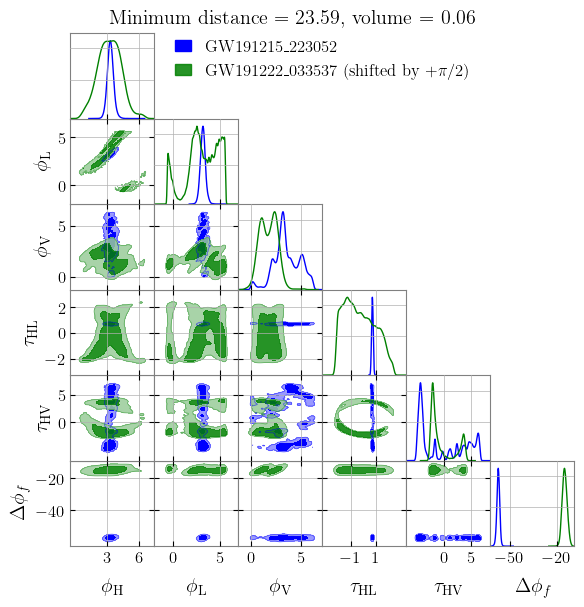

In [12]:
%matplotlib inline
fig